In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import joblib
import pickle

In [25]:
sns.set(style="whitegrid")

In [26]:
df = pd.read_csv("car data.csv")

print(df.head())
print(df.info())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

In [27]:
conversion_rate = 90  # 1 EUR = 90 INR

df["Selling_Price"] = df["Selling_Price"] * 100000 / conversion_rate
df["Present_Price"] = df["Present_Price"] * 100000 / conversion_rate

print(df.head())
print(df.info())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014    3722.222222    6211.111111       27000    Petrol   
1      sx4  2013    5277.777778   10600.000000       43000    Diesel   
2     ciaz  2017    8055.555556   10944.444444        6900    Petrol   
3  wagon r  2011    3166.666667    4611.111111        5200    Petrol   
4    swift  2014    5111.111111    7633.333333       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

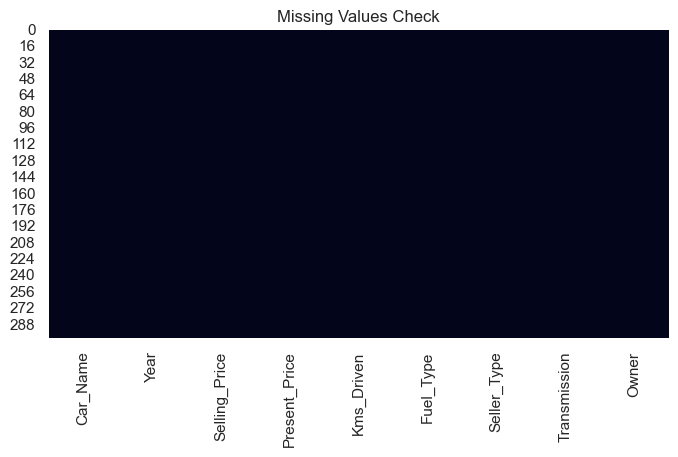

In [28]:
# Missing Values Check
plt.figure(figsize=(8,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Check")
plt.show()

In [29]:
# Encoding Categorical Features
df = df.copy()

# One-hot encoding for better model performance
df = pd.get_dummies(df, columns=["Fuel_Type", "Seller_Type", "Transmission"], drop_first=True)

print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Owner  \
0     ritz  2014    3722.222222    6211.111111       27000      0   
1      sx4  2013    5277.777778   10600.000000       43000      0   
2     ciaz  2017    8055.555556   10944.444444        6900      0   
3  wagon r  2011    3166.666667    4611.111111        5200      0   
4    swift  2014    5111.111111    7633.333333       42450      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0             False              True                   False   
1              True             False                   False   
2             False              True                   False   
3             False              True                   False   
4              True             False                   False   

   Transmission_Manual  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  


In [30]:
X = df.drop(["Selling_Price", "Car_Name"], axis=1)
y = df["Selling_Price"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300, 
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

results = []

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    results.append([name, mse, r2])
    print(f"{name} → MSE: {mse:.3f}, R2: {r2:.3f}")

Linear Regression → MSE: 4294819.717, R2: 0.849
Random Forest → MSE: 1043987.609, R2: 0.963
XGBoost → MSE: 950227.774, R2: 0.967


               Model           MSE  R2 Score
0  Linear Regression  4.294820e+06  0.848981
1      Random Forest  1.043988e+06  0.963290
2            XGBoost  9.502278e+05  0.966587


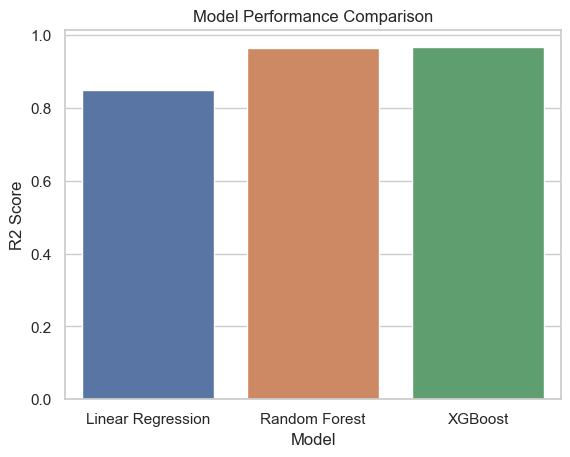

In [36]:
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2 Score"])
print(results_df)

sns.barplot(data=results_df, x="Model", y="R2 Score")
plt.title("Model Performance Comparison")
plt.show()

In [37]:
best_model = models["XGBoost"]

joblib.dump(best_model, "car_price_model.pkl")
pickle.dump(best_model, open("car_price_model.pkl", "wb"))

print("Model saved as car_price_model.pkl")

Model saved as car_price_model.pkl
